# Merge Data

In [1]:
import pandas as pd
import os

# Define the folder paths
folder_2000_2005 = "2000 to 2005 ACCIDENT"  # Replace with the actual path
folder_2006_2020 = "Accident"  # Replace with the actual path

# List of CSV files to merge
csv_files = [
    "accident",
    "person",
    "vehicle",
    "accident_event",
    "ACCIDENT_LOCATION",
    "road_surface_cond",
    "atmospheric_cond",
    "subdca",
    "accident_chainage",
    "Node",
    "NODE_ID_COMPLEX_INT_ID"
]

# Dictionary to hold merged dataframes
merged_data = {}

# Loop through each CSV file and merge
for csv_file in csv_files:
    # Construct the full path for each file in both folders
    path_2000_2005 = os.path.join(folder_2000_2005, csv_file + ".csv")
    path_2006_2020 = os.path.join(folder_2006_2020, csv_file + ".csv")
    
    # Read the CSVs
    df_2000_2005 = pd.read_csv(path_2000_2005)
    df_2006_2020 = pd.read_csv(path_2006_2020)
    
    # Concatenate the DataFrames
    merged_df = pd.concat([df_2000_2005, df_2006_2020], ignore_index=True)
    
    # Store the merged DataFrame in the dictionary
    merged_data[csv_file] = merged_df

C:\Users\buida\AppData\Local\Temp/ipykernel_8644/2748065923.py:33: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2000_2005 = pd.read_csv(path_2000_2005)
C:\Users\buida\AppData\Local\Temp/ipykernel_8644/2748065923.py:34: DtypeWarning: Columns (10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2006_2020 = pd.read_csv(path_2006_2020)
C:\Users\buida\AppData\Local\Temp/ipykernel_8644/2748065923.py:33: DtypeWarning: Columns (0,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2000_2005 = pd.read_csv(path_2000_2005)
C:\Users\buida\AppData\Local\Temp/ipykernel_8644/2748065923.py:34: DtypeWarning: Columns (6,9,10,13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_2006_2020 = pd.read_csv(path_2006_2020)
C:\Users\buida\AppData\Local\Temp/ipykernel_8644/2748065923.py:33: DtypeWarning: Columns (0,3,11,36) have mixed types. Specify dtype opti

# Accident over Time

C:\Users\buida\AppData\Local\Temp/ipykernel_8644/1491937587.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_1a.loc[:, 'SEVERITY'] = filtered_data_1a['SEVERITY'].map(severity_mapping)


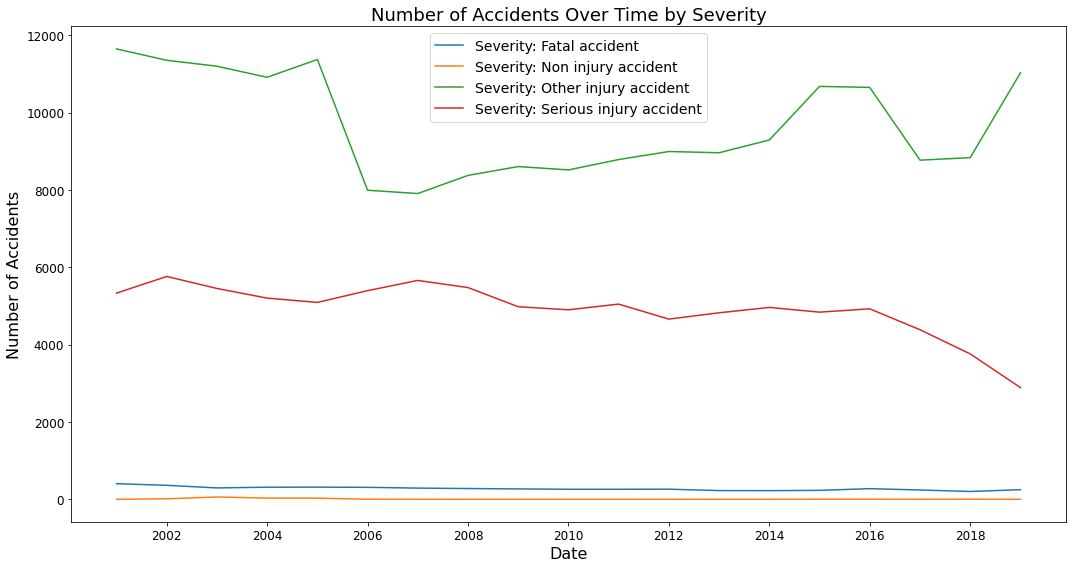

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert ACCIDENTDATE to datetime format
merged_data["accident"]['ACCIDENTDATE'] = pd.to_datetime(merged_data["accident"]['ACCIDENTDATE'], dayfirst=True)

# Remove data for years 2000 and 2020
filtered_data_1 = merged_data["accident"][~merged_data["accident"]['ACCIDENTDATE'].dt.year.isin([2000, 2020])]
filtered_data_1a = filtered_data_1
# Change the label of Severity
severity_mapping = {
    1: 'Fatal accident',
    2: 'Serious injury accident',
    3: 'Other injury accident',
    4: 'Non injury accident'
}
filtered_data_1a.loc[:, 'SEVERITY'] = filtered_data_1a['SEVERITY'].map(severity_mapping)

# Group by month and severity and count the number of accidents
yearly_accidents = (filtered_data_1a.groupby([filtered_data_1a['ACCIDENTDATE'].dt.to_period("Y"), 'SEVERITY'])
                     .size()
                     .unstack()
                     .fillna(0))

# Convert Period index back to datetime format for plotting
yearly_accidents.index = yearly_accidents.index.to_timestamp()


# Plot
plt.figure(figsize=(15, 8))
for severity, values in yearly_accidents.items():
    # Check if there are any non-zero values for the severity
    if values.sum() > 0:
        plt.plot(values, label=f'Severity: {severity}')

plt.title('Number of Accidents Over Time by Severity', fontsize=18)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.legend(fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

# Monthly Crash Frequency by Severity

C:\Users\buida\AppData\Local\Temp/ipykernel_8644/1170918388.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_2a.loc[:, 'SEVERITY'] = filtered_data_2['SEVERITY'].map(severity_mapping)


<Figure size 1080x576 with 0 Axes>

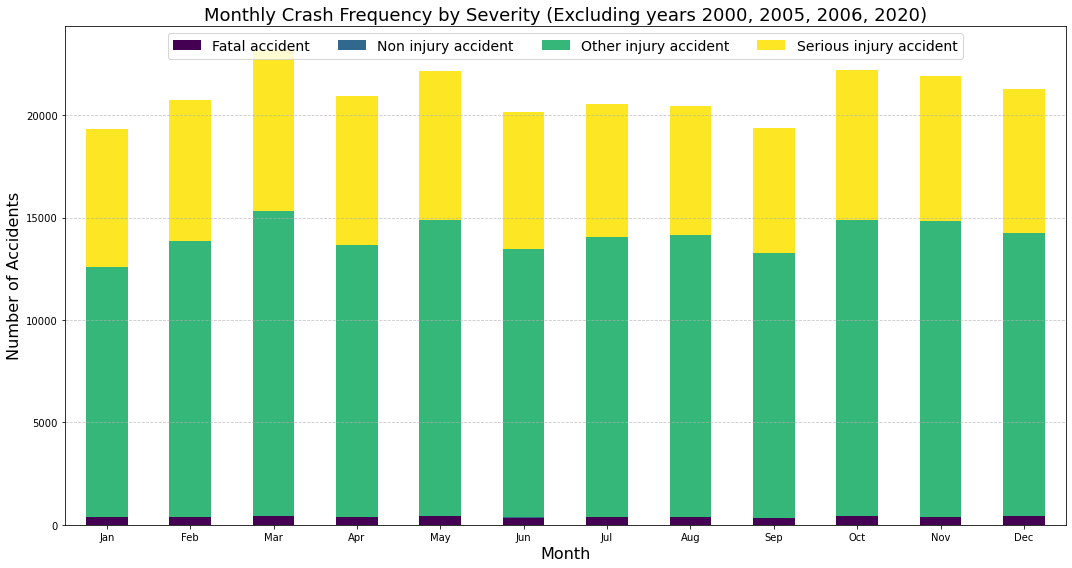

In [3]:
# Filtering the data based on the specified years
filtered_data_2 = merged_data["accident"][~merged_data["accident"]['ACCIDENTDATE'].dt.year.isin([2000, 2005, 2006, 2020])]
filtered_data_2a = filtered_data_2
# Change the label of Severity
severity_mapping = {
    1: 'Fatal accident',
    2: 'Serious injury accident',
    3: 'Other injury accident',
    4: 'Non injury accident'
}
filtered_data_2a.loc[:, 'SEVERITY'] = filtered_data_2['SEVERITY'].map(severity_mapping)

# Grouping by month and severity to calculate the number of accidents for each month
monthly_crash_frequency = filtered_data_2a.groupby([filtered_data_2['ACCIDENTDATE'].dt.month, 'SEVERITY']).size().unstack().fillna(0)

# Plotting the stacked bar chart
plt.figure(figsize=(15, 8))
monthly_crash_frequency.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')

plt.title('Monthly Crash Frequency by Severity (Excluding years 2000, 2005, 2006, 2020)', fontsize=18)
plt.xlabel('Month', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=0)
plt.legend(fontsize=14,loc='upper center', ncol=4)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Daily Crash Frequency by Severity

<Figure size 1080x576 with 0 Axes>

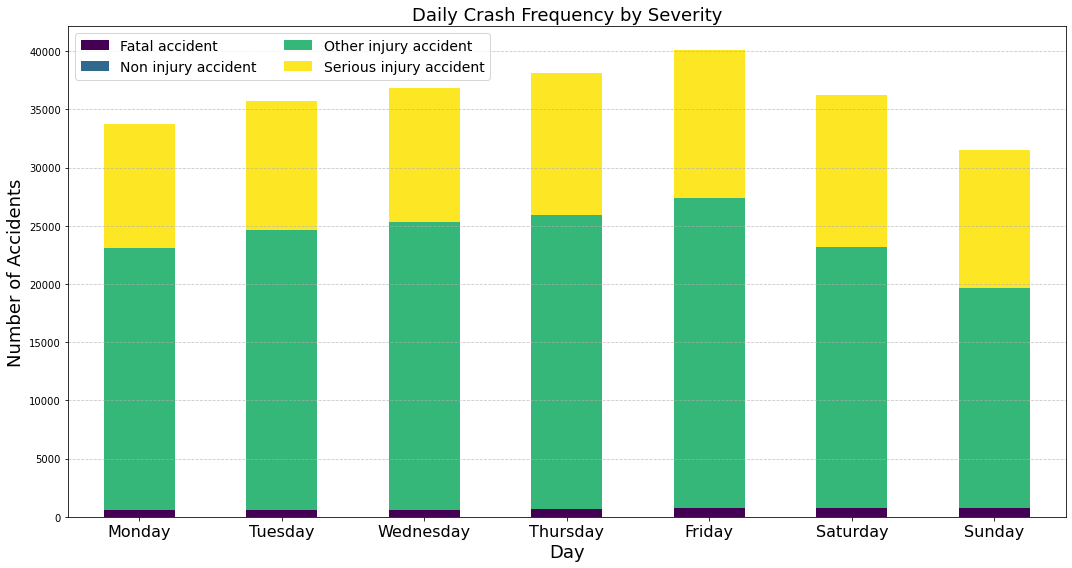

In [4]:
# Filtering the data based on the specified years
filtered_data_3 = merged_data["accident"]
filtered_data_3a = filtered_data_3
# Change the label of Severity
severity_mapping = {
    1: 'Fatal accident',
    2: 'Serious injury accident',
    3: 'Other injury accident',
    4: 'Non injury accident'
}
filtered_data_3a.loc[:, 'SEVERITY'] = filtered_data_3['SEVERITY'].map(severity_mapping)

# Grouping by Day of Week and severity to calculate the number of accidents for each day
daily_crash_frequency = filtered_data_3a.groupby([filtered_data_2['Day Week Description'], 'SEVERITY']).size().unstack().fillna(0)

# Define an ordered category for the days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_crash_frequency = daily_crash_frequency.reindex(day_order)

# Plotting the stacked bar chart
plt.figure(figsize=(15, 8))
daily_crash_frequency.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')

plt.title('Daily Crash Frequency by Severity', fontsize=18)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Number of Accidents', fontsize=18)
plt.xticks(ticks=range(7), fontsize=16, rotation=0)
plt.legend(fontsize=14,loc='upper left', ncol=2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Hourly Crash Frequency by Severity

C:\Users\buida\AppData\Local\Temp/ipykernel_8644/2036129946.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  filtered_data_3b['ACCIDENTTIME'] = filtered_data_3a['ACCIDENTTIME'].str.replace('.', ':')


<Figure size 1080x576 with 0 Axes>

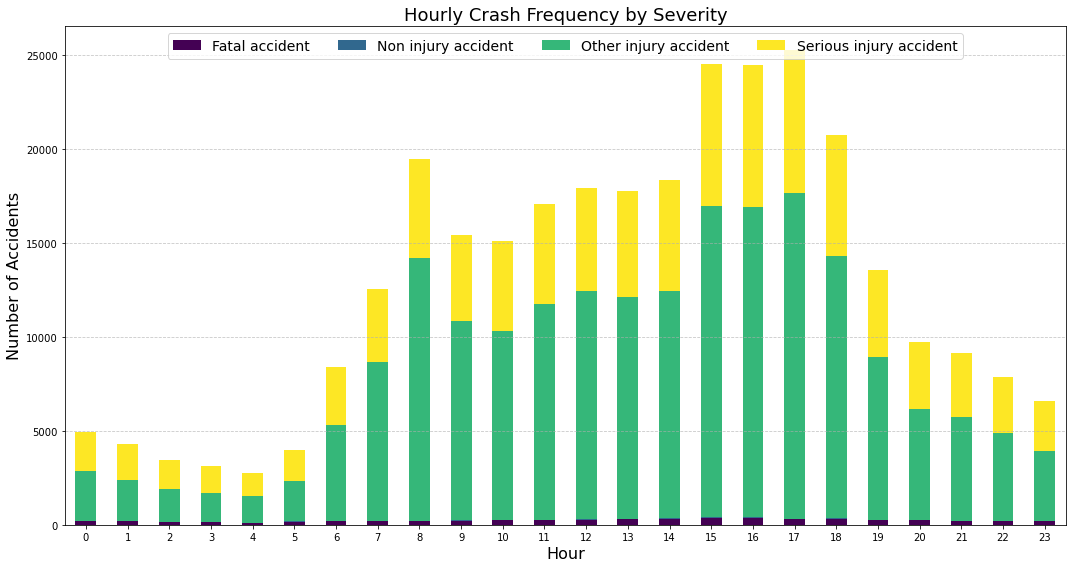

In [5]:
# Filtering the data based on the specified years
filtered_data_3b = filtered_data_3a

# Replace "." with ":" in the ACCIDENTTIME column
filtered_data_3b['ACCIDENTTIME'] = filtered_data_3a['ACCIDENTTIME'].str.replace('.', ':')
filtered_data_3c = filtered_data_3b

# Extract the hour
filtered_data_3c['ACCIDENTTIME'] = filtered_data_3b['ACCIDENTTIME'].str.split(':').str[0]

# Convert the HOUR column to numeric
filtered_data_3c['ACCIDENTTIME'] = pd.to_numeric(filtered_data_3c['ACCIDENTTIME'], errors='coerce')

# Grouping by hour and severity to calculate the number of accidents for each hour
hourly_crash_frequency = filtered_data_3c.groupby([filtered_data_3c['ACCIDENTTIME'], 'SEVERITY']).size().unstack().fillna(0)

# Plotting the stacked bar chart
plt.figure(figsize=(15, 8))
hourly_crash_frequency.plot(kind='bar', stacked=True, figsize=(15, 8), colormap='viridis')

plt.title('Hourly Crash Frequency by Severity', fontsize=18)
plt.xlabel('Hour', fontsize=16)
plt.ylabel('Number of Accidents', fontsize=16)
plt.xticks(ticks=range(24), labels=[str(i) for i in range(24)], rotation=0)
plt.legend(fontsize=14,loc='upper center', ncol=4)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Add Suburb name base on Postcode

In [6]:
# Merging the Accident dataframe with the Node dataframe on the "ACCIDENT_NO" column to get the "POSTCODE_NO" column
merged_df = merged_data["accident"].merge(merged_data["Node"][['ACCIDENT_NO', 'POSTCODE_NO', 'Lat','Long','LGA_NAME']], on='ACCIDENT_NO', how='left')

# Renaming the POSTCODE_NO column to POSTCODE for clarity
merged_df.rename(columns={'POSTCODE_NO': 'POSTCODE'}, inplace=True)

# Display the first few rows of the merged dataframe to confirm
merged_df.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,...,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE,POSTCODE,Lat,Long,LGA_NAME
0,12000000389,2000-01-04,22.0,4,Collision with a fixed object,3,Tuesday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,MEL,...,0,1,5,Not at intersection,Fatal accident,90,3173.0,-38.00211,145.14248,DANDENONG
1,12000000554,2000-01-06,22.0,4,Collision with a fixed object,5,Thursday,171,LEFT OFF CARRIAGEWAY INTO OBJECT/PARKED VEHICL...,MEL,...,0,1,2,T intersection,Serious injury accident,60,3192.0,-37.96545,145.07453,KINGSTON
2,12000000555,2000-01-01,18.0,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),MEL,...,2,1,2,T intersection,Serious injury accident,60,3182.0,-37.86314,144.98067,PORT PHILLIP
3,12000000559,2000-01-02,1.0,4,Collision with a fixed object,1,Sunday,181,OFF RIGHT BEND INTO OBJECT/PARKED VEHICLE ...,MEL,...,0,1,5,Not at intersection,Serious injury accident,60,3188.0,-37.94404,145.00131,BAYSIDE
4,12000000586,2000-01-03,23.0,1,Collision with vehicle,2,Monday,110,CROSS TRAFFIC(INTERSECTIONS ONLY),MEL,...,1,1,1,Cross intersection,Other injury accident,70,3145.0,-37.88455,145.06748,STONNINGTON


In [7]:
# Loading the suburb dataset from the provided Excel file
suburb_df = pd.read_excel('suburb.xlsx')

# Merging the merged_df with the suburb_df on the "POSTCODE" column to get the corresponding suburb (locality)
merged_df_with_suburb = merged_df.merge(suburb_df, left_on='POSTCODE', right_on='postcode', how='left')

# Picking only the first suburb for each accident record
merged_df_with_suburb = merged_df_with_suburb.drop_duplicates(subset='ACCIDENT_NO', keep='first')

# Renaming the locality column to SUBURB for clarity
merged_df_with_suburb.rename(columns={'locality': 'SUBURB'}, inplace=True)

# Display the first few rows of the merged dataframe to confirm
merged_df_with_suburb[['ACCIDENT_NO', 'POSTCODE', 'SUBURB']].head()

,ACCIDENT_NO,POSTCODE,SUBURB
0,12000000389,3173.0,KEYSBOROUGH
1,12000000554,3192.0,CHELTENHAM
5,12000000555,3182.0,ST KILDA
8,12000000559,3188.0,HAMPTON
11,12000000586,3145.0,CAULFIELD EAST


# Top 10 Local Government Area

In [8]:
# Merging the accident and node datasets on ACCIDENT_NO to get the LGA_NAME for each accident
accident_with_lga = pd.merge(merged_data['accident'], merged_data['Node'], on="ACCIDENT_NO", how="left")

# Grouping by LGA_NAME and counting the number of accidents
lga_accident_counts = accident_with_lga.groupby('LGA_NAME').size().sort_values(ascending=False)

# Displaying the top 10 LGA_NAMEs with the most accidents
top_10_lga = lga_accident_counts.head(10)
top_10_lga

LGA_NAME
MELBOURNE    22737
GEELONG      11029
BRIMBANK      9613
MORELAND      9490
HUME          9370
KINGSTON      8933
CASEY         8659
MONASH        8394
YARRA         8015
DAREBIN       8003
dtype: int64

# Impact Accessment

### Light Condition

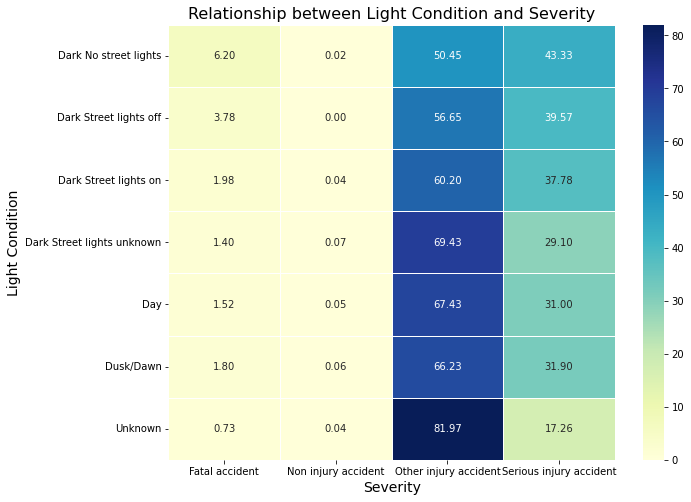

In [13]:
# Creating a crosstab between 'Light Condition Desc' and 'SEVERITY'
cross_tab = pd.crosstab(filtered_data_3a['Light Condition Desc'], filtered_data_3a['SEVERITY'])

# Convert counts to percentages by dividing each column by the sum of that column
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab_percentage, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Relationship between Light Condition and Severity', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Light Condition', fontsize=14)
plt.show()

### Speed Zone

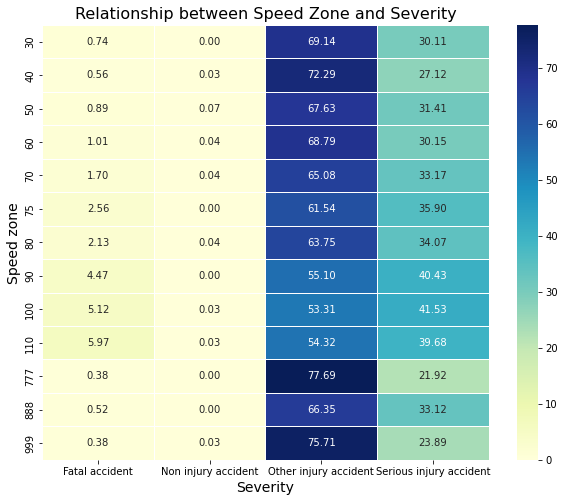

In [15]:
# Creating a crosstab between 'Speed Zone' and 'SEVERITY'
cross_tab_speedzone = pd.crosstab(filtered_data_3a['SPEED_ZONE'], filtered_data_3a['SEVERITY'])

# Convert counts to percentages by dividing each column by the sum of that column
cross_tab_percentage_speedzone = cross_tab_speedzone.div(cross_tab_speedzone.sum(axis=1), axis=0) * 100

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab_percentage_speedzone, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Relationship between Speed Zone and Severity', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Speed zone', fontsize=14)
plt.show()

### Atmospheric Condition

In [16]:
# Merging the Accident dataframe with the Atmospheric_cond dataframe on the "ACCIDENT_NO" column to get the 'Atmosph Cond Desc' column
merged_df_Atmospheric = pd.merge(merged_data["accident"], merged_data["atmospheric_cond"][['ACCIDENT_NO', 'Atmosph Cond Desc']], on='ACCIDENT_NO', how='inner')

# Display the first few rows of the merged dataframe to confirm
merged_df_Atmospheric.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,...,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE,Atmosph Cond Desc
0,52004039979,2004-12-02,11.0,4,Collision with a fixed object,5,Thursday,183,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE ...,VCS,...,0,1,0,0,1,5,Not at intersection,Other injury accident,100,Clear
1,52004039984,2004-12-03,13.0,1,Collision with vehicle,6,Friday,130,REAR END(VEHICLES IN SAME LANE),MEL,...,0,2,0,1,2,5,Not at intersection,Other injury accident,60,Clear
2,52004039985,2004-12-08,9.0,2,Struck Pedestrian,4,Wednesday,100,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIG...,MEL,...,0,1,0,2,1,5,Not at intersection,Other injury accident,40,Clear
3,52004039986,2004-12-03,15.0,1,Collision with vehicle,6,Friday,130,REAR END(VEHICLES IN SAME LANE),MEL,...,0,1,0,2,2,5,Not at intersection,Other injury accident,70,Clear
4,52004039990,2004-12-02,10.0,6,Vehicle overturned (no collision),5,Thursday,180,OFF CARRIAGEWAY ON RIGHT BEND,VCS,...,0,1,0,0,1,5,Not at intersection,Other injury accident,100,Clear


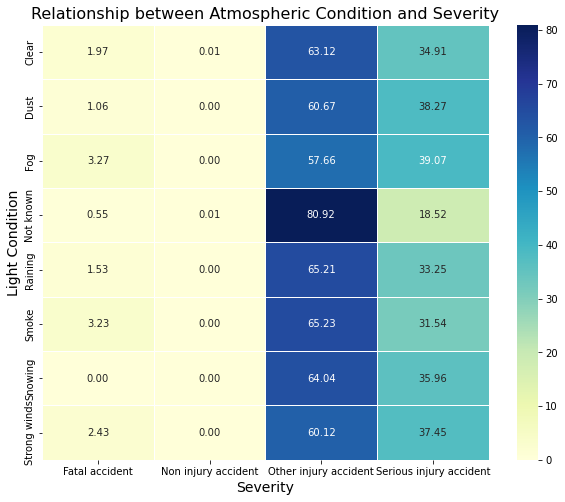

In [17]:
# Creating a crosstab between 'Atmosph Cond Desc' and 'SEVERITY'
cross_tab = pd.crosstab(merged_df_Atmospheric['Atmosph Cond Desc'], merged_df_Atmospheric['SEVERITY'])

# Convert counts to percentages by dividing each column by the sum of that column
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab_percentage, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Relationship between Atmospheric Condition and Severity', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Light Condition', fontsize=14)
plt.show()

### Road Surface Condition

In [18]:
# Merging the Accident dataframe with the Atmospheric_cond dataframe on the "ACCIDENT_NO" column to get the 'Surface Cond Desc' column
merged_df_Surface = pd.merge(merged_data["accident"], merged_data["road_surface_cond"][['ACCIDENT_NO', 'Surface Cond Desc']], on='ACCIDENT_NO', how='inner')

# Display the first few rows of the merged dataframe to confirm
merged_df_Surface.head()

,ACCIDENT_NO,ACCIDENTDATE,ACCIDENTTIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,DIRECTORY,...,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,POLICE_ATTEND,ROAD_GEOMETRY,Road Geometry Desc,SEVERITY,SPEED_ZONE,Surface Cond Desc
0,52004039979,2004-12-02,11.0,4,Collision with a fixed object,5,Thursday,183,OFF LEFT BEND INTO OBJECT/PARKED VEHICLE ...,VCS,...,0,1,0,0,1,5,Not at intersection,Other injury accident,100,Dry
1,52004039984,2004-12-03,13.0,1,Collision with vehicle,6,Friday,130,REAR END(VEHICLES IN SAME LANE),MEL,...,0,2,0,1,2,5,Not at intersection,Other injury accident,60,Dry
2,52004039985,2004-12-08,9.0,2,Struck Pedestrian,4,Wednesday,100,PED NEAR SIDE. PED HIT BY VEHICLE FROM THE RIG...,MEL,...,0,1,0,2,1,5,Not at intersection,Other injury accident,40,Wet
3,52004039986,2004-12-03,15.0,1,Collision with vehicle,6,Friday,130,REAR END(VEHICLES IN SAME LANE),MEL,...,0,1,0,2,2,5,Not at intersection,Other injury accident,70,Dry
4,52004039990,2004-12-02,10.0,6,Vehicle overturned (no collision),5,Thursday,180,OFF CARRIAGEWAY ON RIGHT BEND,VCS,...,0,1,0,0,1,5,Not at intersection,Other injury accident,100,Dry


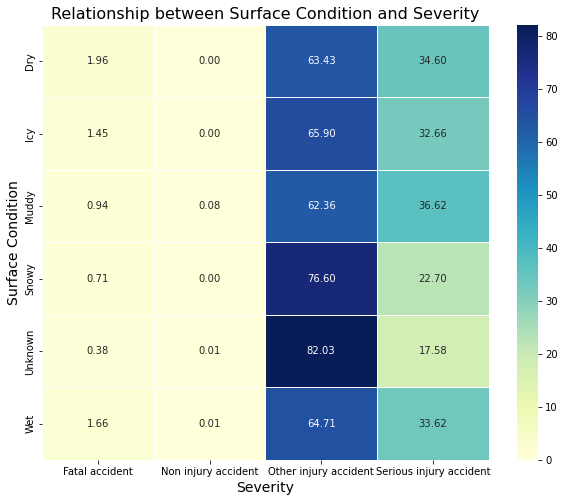

In [20]:
# Creating a crosstab between 'Atmosph Cond Desc' and 'SEVERITY'
cross_tab = pd.crosstab(merged_df_Surface['Surface Cond Desc'], merged_df_Surface['SEVERITY'])

# Convert counts to percentages by dividing each column by the sum of that column
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab_percentage, annot=True, fmt=".2f", cmap="YlGnBu", linewidths=.5)
plt.title('Relationship between Surface Condition and Severity', fontsize=16)
plt.xlabel('Severity', fontsize=14)
plt.ylabel('Surface Condition', fontsize=14)
plt.show()

# Prepare data for ML model

In [22]:
import re
# Merge with Road_Surface_Cond table
merged_df_1 = pd.merge(merged_data["accident"], merged_data["road_surface_cond"][['ACCIDENT_NO', 'SURFACE_COND']], on='ACCIDENT_NO', how='left')

# Merge with Atmospheric_Cond table
merged_df_2 = pd.merge(merged_df_1, merged_data["atmospheric_cond"][['ACCIDENT_NO', 'ATMOSPH_COND']], on='ACCIDENT_NO', how='left')

# Merge with Node table
merged_df_3 = pd.merge(merged_df_2, merged_data["Node"][['ACCIDENT_NO', 'LGA_NAME']], on='ACCIDENT_NO', how='left')

# Extract the hour from the `ACCIDENTTIME` column using the correct format and create a new column
# Replace "." with ":" in the ACCIDENTTIME column
#merged_df_3['ACCIDENTTIME'] = merged_df_3['ACCIDENTTIME'].str.replace('.', ':')

# Extract the hour
#merged_df_3['HOUR'] = merged_df_3['ACCIDENTTIME'].str.split(':').str[0]

# Convert the HOUR column to numeric
merged_df_3['HOUR'] = merged_df_3['ACCIDENTTIME']


# Filter the dataframe to only include the desired columns
final_df = merged_df_3[['HOUR', 'DAY_OF_WEEK', 'LIGHT_CONDITION', 'SPEED_ZONE', 'SURFACE_COND', 'ATMOSPH_COND', 'LGA_NAME', 'SEVERITY']]

# Drop rows with missing values
cleaned_df = final_df.dropna()

# Display the first few rows of the final dataframe
print(cleaned_df.head())

        HOUR  DAY_OF_WEEK  LIGHT_CONDITION  SPEED_ZONE  SURFACE_COND  \
102694   0.0            1                3          60           1.0   
102695  19.0            6                1          60           1.0   
102696  15.0            5                1          60           1.0   
102697  12.0            2                1          60           1.0   
102698  19.0            5                1          60           1.0   

        ATMOSPH_COND   LGA_NAME                 SEVERITY  
102694           1.0      YARRA  Serious injury accident  
102695           1.0      YARRA    Other injury accident  
102696           1.0  MELBOURNE    Other injury accident  
102697           1.0  MELBOURNE    Other injury accident  
102698           1.0      YARRA    Other injury accident  


In [ ]:
output_file_path = "Clean_data.xlsx"
cleaned_df.to_excel(output_file_path)